### Problem Definition:
We have a dataset of used cars regarding their pricing and other features about the corresponding used cars being sold or is available for purchase at some cities in India market.

<font color=darkblue>
    
**Develop a pricing model that can effectively predict the market price of a used car from a variety of features regarding the car.**

In [1]:
# importing required libraries
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# To ignore filterwarnings
import warnings
warnings.filterwarnings("ignore")

# To split data randomly 
from sklearn.model_selection import train_test_split

# To create linear regression model
from sklearn.linear_model import LinearRegression

# To scale features wherever appropriate
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the data into pandas dataframe
df_used_cars = pd.read_csv("used_cars_data.csv", index_col=0)
print(f'There are {df_used_cars.shape[0]} rows and {df_used_cars.shape[1]} columns.')  # f-string
df_used_cars.head()

There are 7253 rows and 13 columns.


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
# Let's look at 10 random rows to have a broader view
# Set the random seed via np.random.seed to get the same random result every time
np.random.seed(5)
df_used_cars.sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
1904,Mercedes-Benz New C-Class 250 CDI Classic,Hyderabad,2012,41367,Diesel,Automatic,First,15.8 kmpl,2148 CC,170 bhp,5.0,NaN,18.49
7160,Mini Cooper Countryman D,Hyderabad,2013,50000,Diesel,Automatic,First,23.8 kmpl,1998 CC,112 bhp,5.0,NaN,NaN
3854,Hyundai Sonata GOLD,Chennai,2003,44200,Petrol,Manual,Second,11.7 kmpl,1997 CC,134 bhp,5.0,NaN,1.50
489,Mercedes-Benz GLS 350d 4MATIC,Pune,2017,129000,Diesel,Automatic,First,11.0 kmpl,2987 CC,258 bhp,7.0,1 Cr,56.00
3819,Renault Fluence 2.0,Jaipur,2011,63000,Petrol,Automatic,First,13.4 kmpl,1997 CC,135.1 bhp,5.0,NaN,4.75
453,Mitsubishi Cedia Sports,Chennai,2010,66000,Petrol,Manual,Second,13.17 kmpl,1999 CC,114 bhp,5.0,NaN,3.85
509,Mahindra XUV500 AT W8 FWD,Bangalore,2015,34000,Diesel,Automatic,First,16.0 kmpl,2179 CC,140 bhp,7.0,NaN,13.00
5577,Volkswagen Polo Diesel Trendline 1.2L,Kolkata,2012,55339,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,NaN,2.65
1778,Hyundai Creta 1.6 SX Plus Dual Tone Petrol,Coimbatore,2017,19623,Petrol,Manual,First,15.29 kmpl,1591 CC,121.3 bhp,5.0,NaN,13.12


In [4]:
df_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


# 1) Processing Columns

#### Mileage, Engine, & Power
- These variables have its respective unit type, we shall discard it and retrieve the numbers.

In [5]:
# put the selected columns into a list
col_to_process = ['Mileage', 'Engine','Power','New_Price']

In [6]:
# check whether 'Mileage', 'Engine' & 'Power' columns contain string type null values
for colname in col_to_process:
    temp_col = df_used_cars[colname]
    check_str_null = temp_col.str.startswith('null').any()
    if check_str_null:
        temp_col.dropna(inplace=True)
        temp_col = temp_col[temp_col.str.startswith('null')].reset_index()
        print("Column {} has some string-type 'null' values.".format(colname),
             "\n\tIts 'null' string includes: '{}'".format(temp_col[colname].unique())
             )
    else:
        print("Column {} has no string-type 'null' value.".format(colname))

Column Mileage has no string-type 'null' value.
Column Engine has no string-type 'null' value.
Column Power has some string-type 'null' values. 
	Its 'null' string includes: '['null bhp']'
Column New_Price has no string-type 'null' value.


- We shall convert string-type null values into numeric NaN values.

In [7]:
def null_str_to_num(null_str):
    """
    This function replace a string starting with 'null' with numeric NaN
    """
    if isinstance(null_str, str):  # checks if `null_str` is a string
        if null_str.startswith('null'):
            return np.nan
        else:
            return null_str
    else:  # this happens when the current income is already np.nan, then retain it as np.nan
        return np.nan

df_used_cars['Power'] = df_used_cars['Power'].apply(null_str_to_num)
count_str_null = df_used_cars[colname][df_used_cars['Power'] == 'null bhp'].count()
print("Now, column Power has {} string-type null values.".format(count_str_null))

Now, column Power has 0 string-type null values.


In [8]:
def measure_to_num(measure):
    """Replace the terminal 'kmpl', 'CC', 'bhp' and 'lakh' with
    the empty string and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(measure, str):
        result = measure.split(" ")
        return float(result[0])
    else:
        return np.nan
    
for colname in col_to_process:
    df_used_cars[colname] = df_used_cars[colname].apply(measure_to_num)
    
df_used_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


# 2) Feature Engineering

- Now, when buyers compare the manufacturing year of the car, it is highly likely that they are concerned about the age of the car.
- So, it would make better sense to convert feature 'Year' into car age.

In [9]:
# Derive a new feature 'Car_Age' from 'Year' feature to replace 'Year'
df_used_cars['Year'] = np.subtract(2021,df_used_cars['Year'])
df_used_cars.rename(columns={'Year': 'Car_Age'}, inplace=True)
df_used_cars.head(2)

,Name,Location,Car_Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,11,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,6,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50


# 3) Basic Summary Statistics and EDA

In [10]:
# a summary of numeric features
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df_used_cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Car_Age,7253.000,7.635,3.254,2.000,5.000,7.000,10.000,25.000
Kilometers_Driven,7253.000,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Mileage,7251.000,18.142,4.562,0.000,15.170,18.160,21.100,33.540
Engine,7207.000,1616.573,595.285,72.000,1198.000,1493.000,1968.000,5998.000
Power,7078.000,112.765,53.494,34.200,75.000,94.000,138.100,616.000
Seats,7200.000,5.280,0.812,0.000,5.000,5.000,5.000,10.000
New_Price,1006.000,19.894,19.814,1.000,7.635,11.270,23.640,99.920
Price,6019.000,9.479,11.188,0.440,3.500,5.640,9.950,160.000


<font color=darkblue>
    
### Some insights:
    
- The average price of pre-owned car is about 9.5 Lakh.
- The pre-owned cars in the market are ranging from 2 years old to 25 years old.
- Most pre-owned cars available are with 5 seats.
- Noted that the mean of Mileage is approximate with its median.

In [11]:
# a summary of non-numeric features
df_used_cars.describe(include='object').T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


<font color=darkblue>
    
### Some insights:
    
- Fuel_Type, Transmission, and Owner_Type should categorical variables.
- There are 2041 unique names, we may drop this feature for better modeling.

In [12]:
# drop 'Name' column
df_used_cars.drop('Name', axis=1, inplace=True)

## 3.1) Univariate analysis

In [13]:
# We want to study their central pricing and dispersion.
# Below is a function to create boxplot and histogram for any input numerical variables.
def histogram_boxplot(feature, figsize=(8,5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

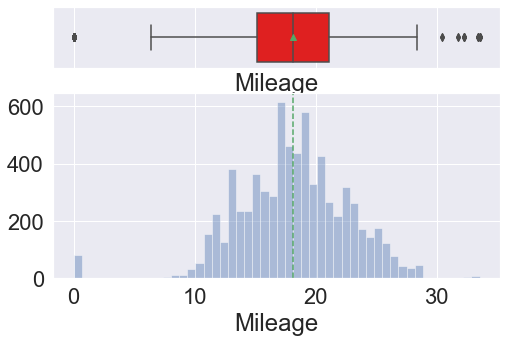

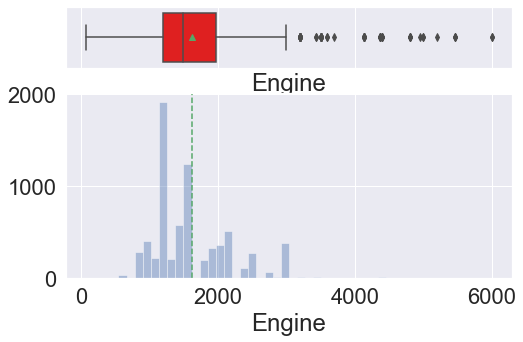

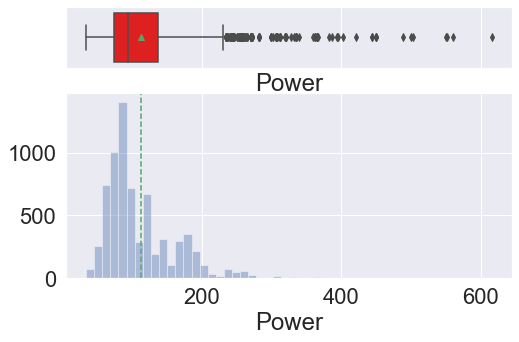

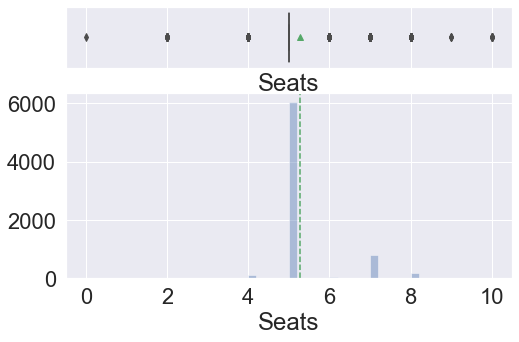

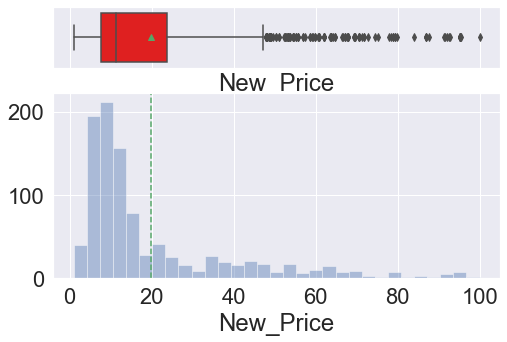

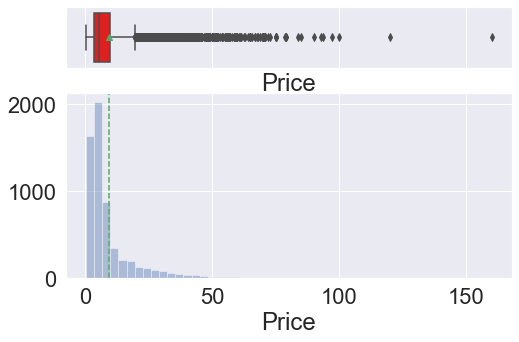

In [14]:
for colname in df_used_cars.columns[
    df_used_cars.dtypes == np.number   # only need to consider string columns
    ]:
    histogram_boxplot(df_used_cars[colname])

<font color=darkblue>
    
### Observations:
Notice that every numerical variable has some outliers. All numerical columns have only upper outliers except Mileage and Seats.
    
Let's take a closer look at each of the distributions:
    
#### i) Mileage:
- Approximate to normal distribution.
- Mean mileage is around 20kmpl.

#### ii) Engine:
- Engine is right-skewed, which means some pre-owned cars have displacement volume higher 5,000CC.
- Mean displacemene volume is around 1,617CC.
    
    
#### iii) Power:
- Power is also right-skewed, the maximum power of some pre-owned cars is higher than 400bhp.
- Mean maximum power is around 113bhp.
    
#### iv) Seats:
- Seats column is apparently a categorical variable.
- Verified that majority of pre-owned cars have 5 seats.
    
#### v) New_Price:
- The price for new cars is also right-skewed, some new cars are being priced above 80 Lakh.
- Mean price for new cars is around 20 Lakh.
    
#### vi) Price:
- The distribution of price for pre-owned cars is also right-skewed, some pre-owned cars are being priced above 100 Lakh.
- Mean price for pre-owned cars is around 9.5 Lakh.

## 3.2) Bivariate Analysis

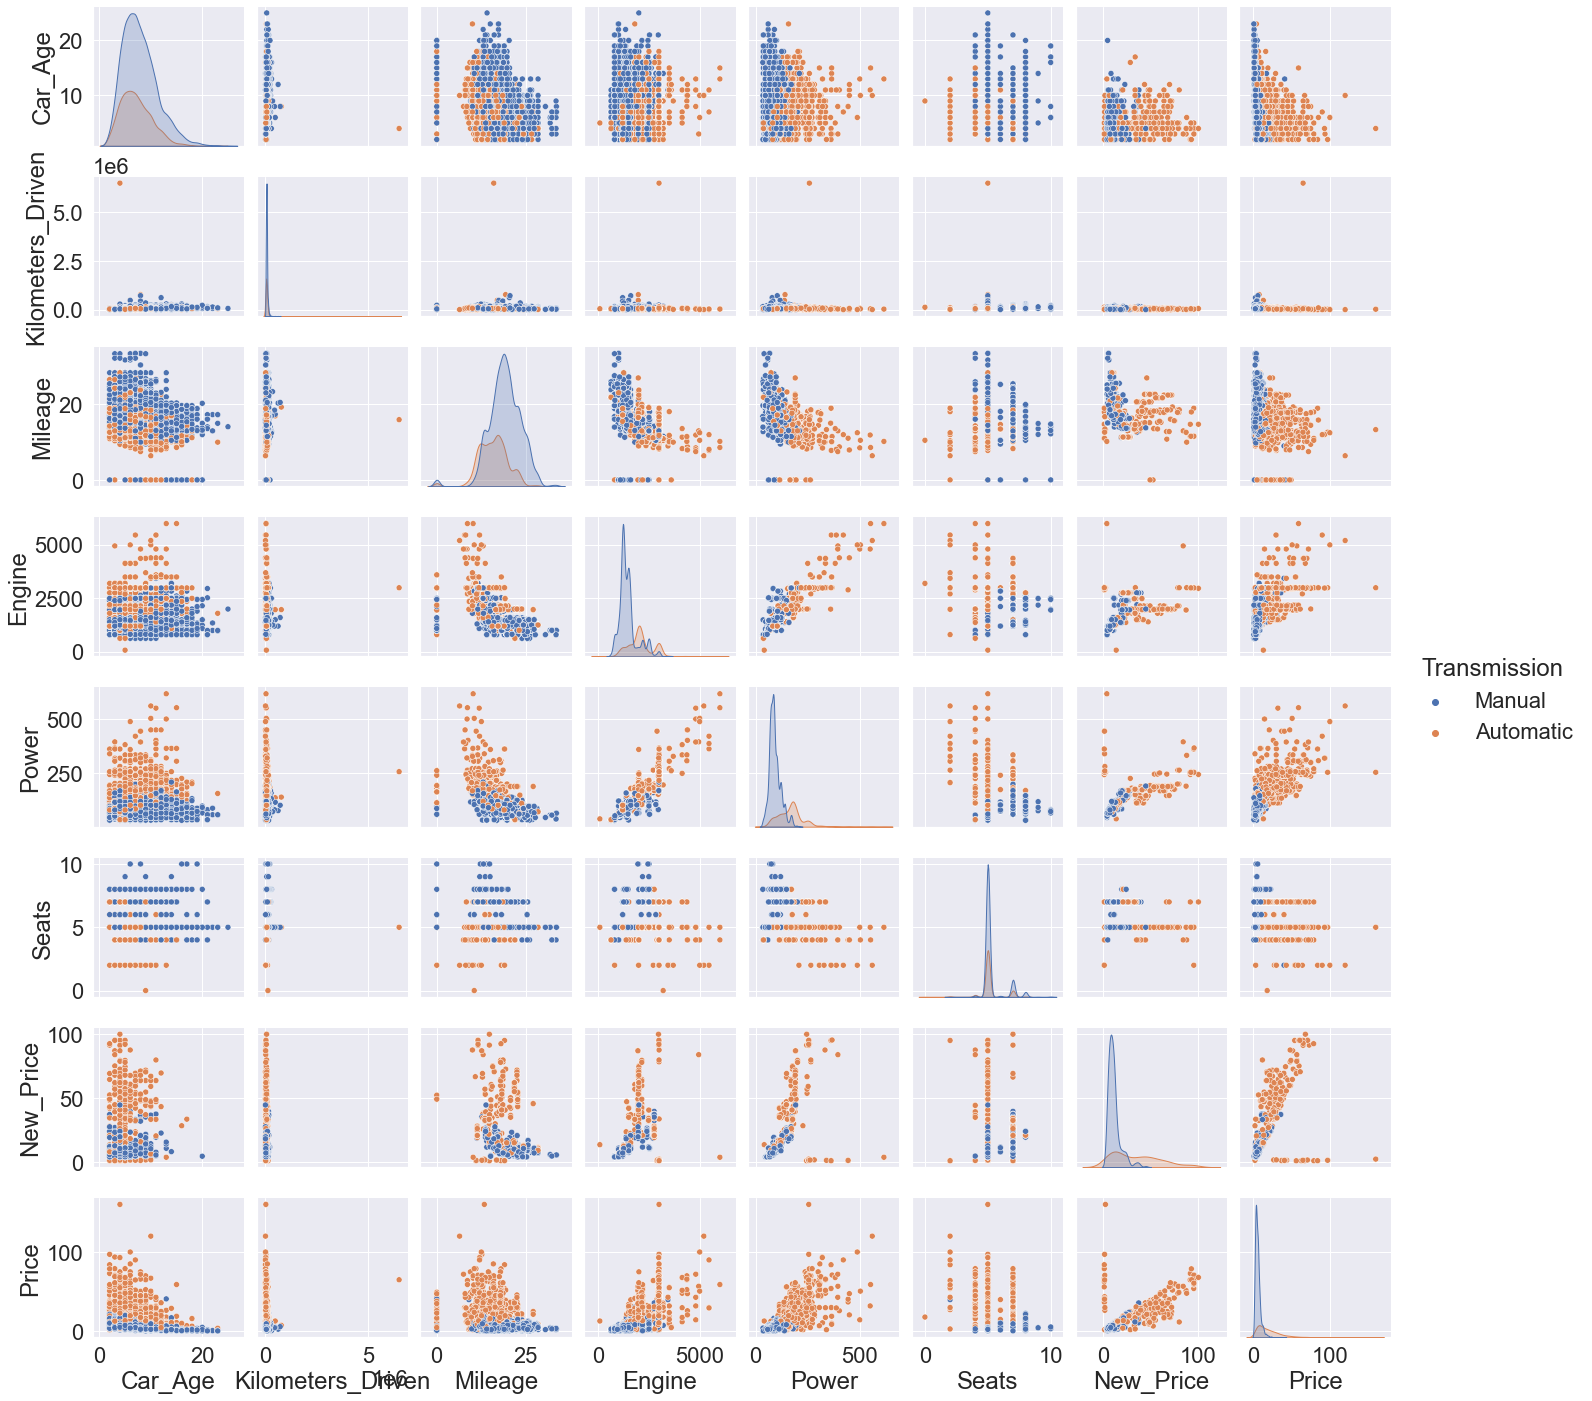

In [15]:
# Let's check the linear relationships of variables
sns.pairplot(df_used_cars, hue='Transmission');

<font color=darkblue>
    
### Observations:
- The manual and automatic transmission have their own somewhat segregated spread, this is especially noticeable between 'Power' and 'Price'. 
- 'Power'and 'Engine' has apparent linear relationship.
- As expected, the older the car, the lower the price.
- Although the price of new cars is fairly deterministic and managed by OEMs, it does reflect some extent of linear relationship with the price of used cars. This is likely because a better quality car tend to fall within same pricing zone, but the price of a used car is being affected by the market demand and supply, which makes it fluctuates.

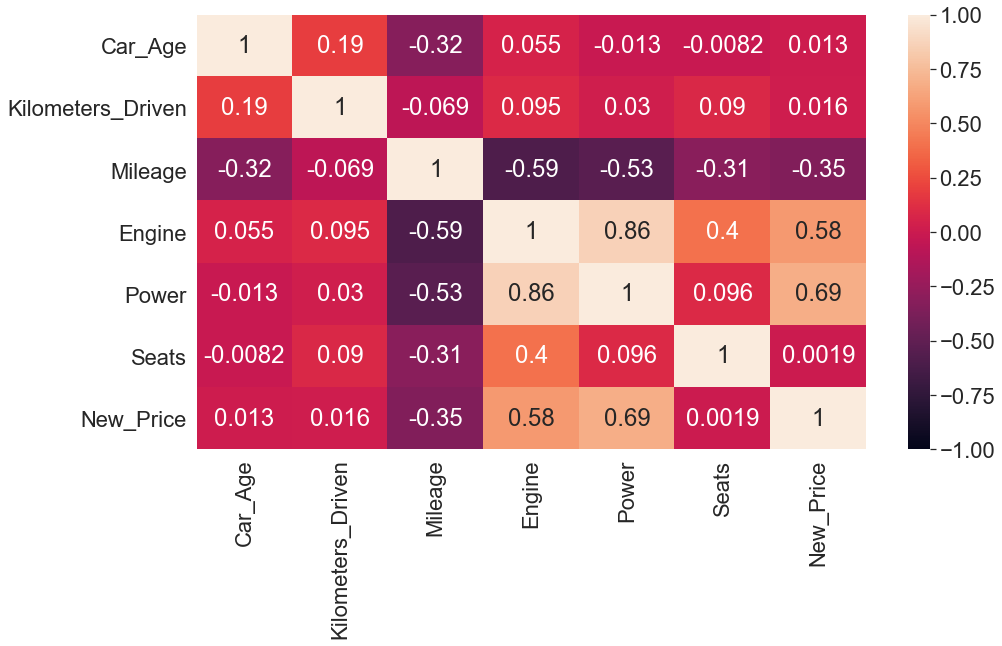

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df_used_cars.drop('Price',axis=1).corr(), annot=True, vmin=-1,vmax=1);

- Noticed that the variable 'Engine' is highly correlated with 'Power',thus we can drop either one of them.
- Let's select to drop 'Engine' feature.

In [17]:
# drop 'Engine'
df_used_cars.drop('Engine', axis=1, inplace=True)

# 4) Data Pre-processing

### i) Distribution and Transformation

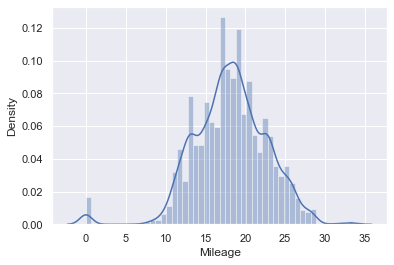

In [18]:
# check the distribution of feature Mileage
sns.set(style="darkgrid")
sns.distplot(df_used_cars['Mileage']);

- From the information above we may assume that the feature Mileage has a Normal Distribution.
- Mileage is ideal to be standardized, we can do it via z-transformation. 

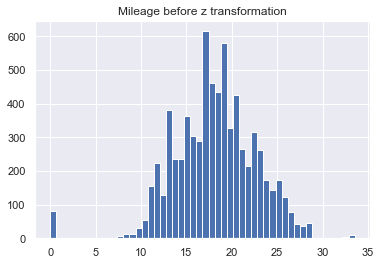

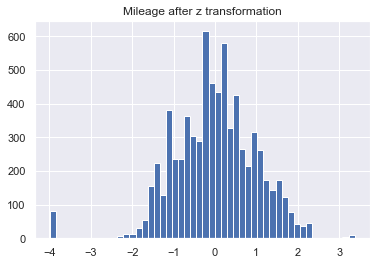

In [19]:
std_scaler = StandardScaler()

df_used_cars['Mileage'].hist(bins=50)
plt.title('Mileage before z transformation')
plt.show()


df_used_cars['Mileage'] = std_scaler.fit_transform(df_used_cars[['Mileage']])
df_used_cars['Mileage'].hist(bins=50)
plt.title('Mileage after z transformation')
plt.show()
# exact same shape since it's a linear transformation.
df_used_cars.rename(columns={'Mileage': 'Mileage_z_std'}, inplace=True)

- Next, Price and Kilometers_Driven is very skewed, and will likely behave better on the log scale.

Non-positive values in Kilometers_Driven: 0


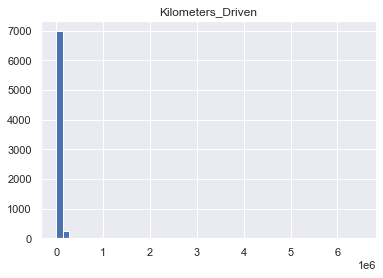

Non-positive values in Price: 0


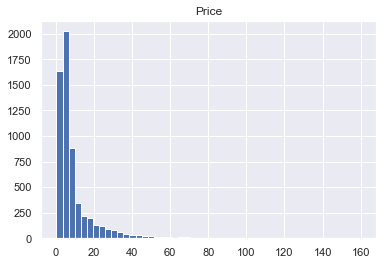

In [20]:
col_skewed = ['Kilometers_Driven', 'Price']
for colname in col_skewed:
    plt.hist(df_used_cars[colname], 50)
    print(f"Non-positive values in {colname}:", # check if any non-positive values
          np.sum(df_used_cars[colname]<=0)) 
    plt.title(colname)
    plt.show()

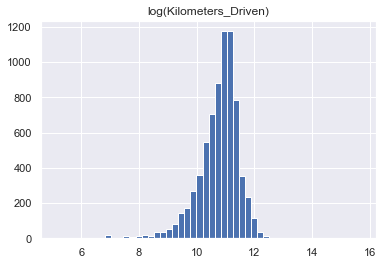

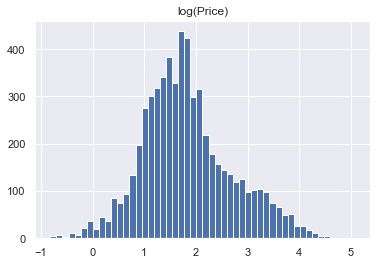

In [21]:
# Let's perform Log transformation on Kilometers_Driven & Price
for colname in col_skewed:
    df_used_cars[colname] = np.log(df_used_cars[colname])
    df_used_cars.rename(columns={colname: f"{colname}_log"}, inplace=True)
    plt.hist(df_used_cars[f"{colname}_log"], 50)
    plt.title(f"log({colname})")
    plt.show()

- In addition, we can scale some features with large range of values to a fixed range via MinMaxScaler

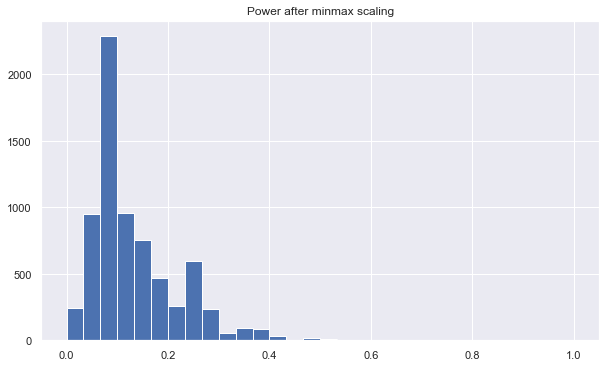

In [22]:
# replacing with scaled 
col_to_scale = ['Power']
df_used_cars[col_to_scale] = MinMaxScaler().fit_transform(df_used_cars[col_to_scale])

i = 1
for colname in col_to_scale:
    plt.figure(figsize=(10,20))
    plt.subplot(3,1,i)
    df_used_cars[colname].hist(bins=30)
    plt.title(f'{colname} after minmax scaling')
    plt.show()
    i += 1

# since the minimum and maximum are treated as fixed, this is also a linear transformation
# so the shape is the same

In [23]:
# view top 2 rows
df_used_cars.head(2)

,Location,Car_Age,Kilometers_Driven_log,Fuel_Type,Transmission,Owner_Type,Mileage_z_std,Power,Seats,New_Price,Price_log
S.No.,,,,,,,,,,,
0,Mumbai,11,11.184,CNG,Manual,First,1.854,0.041,5.000,nan,0.560
1,Pune,6,10.621,Diesel,Manual,First,0.335,0.158,5.000,nan,2.526


In [24]:
# Now, let's look at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df_used_cars.dtypes[df_used_cars.dtypes == 'object'].index:
    val_counts = df_used_cars[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Only displaying first 10 of 11 values.



Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64



Manual       5204
Automatic    2049
Name: Transmission, dtype: int64



First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64





- Before we treat categorical columns, let's handle the missing values first.

### ii) Missing Values

In [25]:
df_used_cars.isnull().sum()

Location                    0
Car_Age                     0
Kilometers_Driven_log       0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage_z_std               2
Power                     175
Seats                      53
New_Price                6247
Price_log                1234
dtype: int64

<font color=darkblue>

- Noticed that 6247 out of 7253 data (about 86%) under New_Price column are missing.
- As we have been informed that the price of new cars are fairly deterministic and managed by OEMs, it doesn't really have a direct impact on the pricing of used cars. 
- The prices of used cars fluctuates up and down in corresponding to other factors in the market, which would however still fall within a similar pricing zone as new cars (as shown in bivariate analysis earlier), due to those other factors are also being used by OEMs to set thier pricing scheme. 
- Thus we are safe to drop New_Price column.

In [26]:
# drop New_Price column
df_used_cars.drop('New_Price', axis = 1, inplace=True)

<font color=darkblue>

- Also, sighted that there are 1234 missing values of Price.
- Since Price is the target label of our dataset, imputed values would distort the predictions, it is better to train the model with the original target labels. 
- So, we will drop those rows with missing target labels

In [27]:
# drop rows with missing target labels
df_used_cars = df_used_cars[pd.notnull(df_used_cars['Price_log'])]
df_used_cars.isnull().sum()

Location                   0
Car_Age                    0
Kilometers_Driven_log      0
Fuel_Type                  0
Transmission               0
Owner_Type                 0
Mileage_z_std              2
Power                    143
Seats                     42
Price_log                  0
dtype: int64

In [28]:
# Do median imputation for continuous data with `fillna` 
col_to_fillna = ['Mileage_z_std', 'Power']
for colname in col_to_fillna:
    df_used_cars[colname].fillna(df_used_cars[colname].median(), inplace=True)
    print("Now {} column has {} missing values.".format(
        colname,df_used_cars[colname].isnull().sum())
    )

Now Mileage_z_std column has 0 missing values.
Now Power column has 0 missing values.


In [29]:
# Do mode imputation for Seats column with `fillna` 
df_used_cars['Seats'].fillna(df_used_cars['Seats'].mode()[0], inplace=True)
print("Now Seats column has {} missing values.".format(df_used_cars['Seats'].isnull().sum()))

Now Seats column has 0 missing values.


### iii) Categorical columns
#### Making categoricals into categorical types

In [30]:
cat_vars = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

for colname in cat_vars:
    df_used_cars[colname] = df_used_cars[colname].astype('category')
    
df_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               6019 non-null   category
 1   Car_Age                6019 non-null   int64   
 2   Kilometers_Driven_log  6019 non-null   float64 
 3   Fuel_Type              6019 non-null   category
 4   Transmission           6019 non-null   category
 5   Owner_Type             6019 non-null   category
 6   Mileage_z_std          6019 non-null   float64 
 7   Power                  6019 non-null   float64 
 8   Seats                  6019 non-null   float64 
 9   Price_log              6019 non-null   float64 
dtypes: category(4), float64(5), int64(1)
memory usage: 353.6 KB


- Noted that Owner_Type is ordered categorical variable.
- We can use LabelEncoder to relabel the data (starting from first ownership in order)

In [31]:
# Use OrdinalEncoder to encode
# First as 1
# Second as 2
# Third as 3
# Fourth & Above as 4
from sklearn.preprocessing import OrdinalEncoder
OrdinalEncoder = OrdinalEncoder()
df_used_cars['Owner_Type'].replace({
    'First': 'a-1st', 
    'Second': 'b-2nd', 
    'Third': 'c-3rd', 
    'Fourth & Above' : 'd-4th & Above' 
}, inplace=True)

df_used_cars['Owner_Type'] = OrdinalEncoder.fit_transform(df_used_cars[['Owner_Type']]) + 1
df_used_cars.head()

,Location,Car_Age,Kilometers_Driven_log,Fuel_Type,Transmission,Owner_Type,Mileage_z_std,Power,Seats,Price_log
S.No.,,,,,,,,,,
0,Mumbai,11,11.184,CNG,Manual,1.000,1.854,0.041,5.000,0.560
1,Pune,6,10.621,Diesel,Manual,1.000,0.335,0.158,5.000,2.526
2,Chennai,10,10.736,Petrol,Manual,1.000,0.013,0.094,5.000,1.504
3,Chennai,9,11.374,Diesel,Manual,1.000,0.576,0.094,7.000,1.792
4,Coimbatore,8,10.613,Diesel,Automatic,2.000,-0.645,0.183,5.000,2.876


In [32]:
# Use One-Hot Encoding for the other categorical variables
cat_vars2 = ['Location', 'Fuel_Type', 'Transmission']
df_used_cars = pd.get_dummies(df_used_cars, columns=cat_vars2, drop_first=True)
df_used_cars.head()

,Car_Age,Kilometers_Driven_log,Owner_Type,Mileage_z_std,Power,Seats,Price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
S.No.,,,,,,,,,,,,,,,,,,,,,
0,11,11.184,1.000,1.854,0.041,5.000,0.560,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,6,10.621,1.000,0.335,0.158,5.000,2.526,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,10,10.736,1.000,0.013,0.094,5.000,1.504,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,9,11.374,1.000,0.576,0.094,7.000,1.792,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,8,10.613,2.000,-0.645,0.183,5.000,2.876,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [33]:
# Also, sighted that 'Owner_Type' and 'Seats' should be dscrete number
# Convert Seats data type from float into integer
col_fl_int = ['Owner_Type', 'Seats']
for colname in col_fl_int:
    df_used_cars[colname] = df_used_cars[colname].apply(int)

### iv) Treating Outlier

In [34]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [35]:
outlier_col = ['Car_Age', 'Kilometers_Driven_log', 'Mileage_z_std','Power', 'Price_log']
new_df_used_cars = treat_outliers_all(df_used_cars,outlier_col)

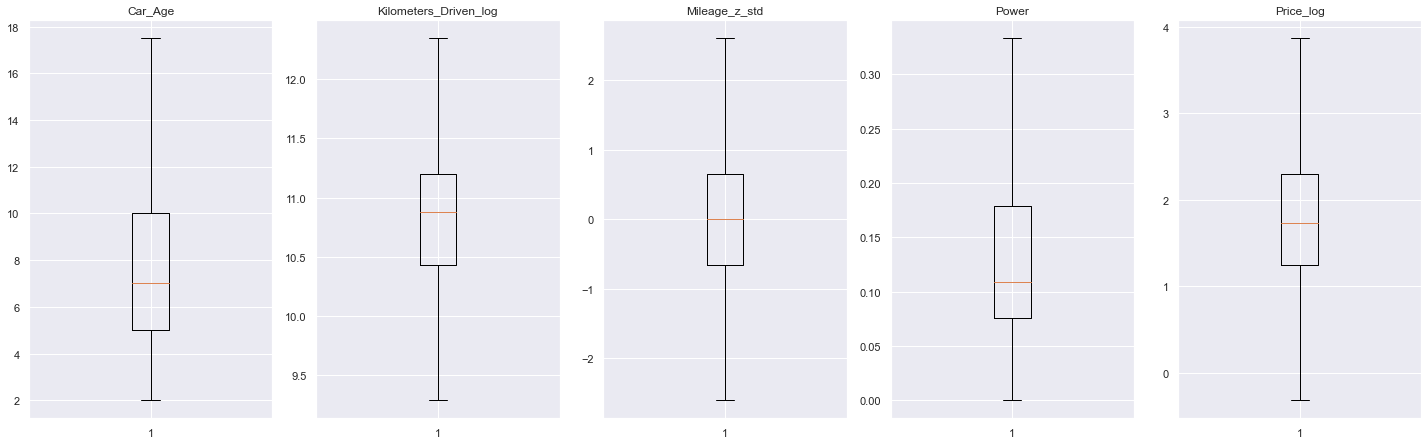

In [36]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(outlier_col):
                     plt.subplot(5,5,i+1)
                     plt.boxplot(new_df_used_cars[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

# 5) Model Building

#### Split data

In [37]:
# independant variables
X = new_df_used_cars.drop(['Price_log'], axis=1)
# the dependent variable
y = new_df_used_cars[['Price_log']]

# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#### Fit Linear Model

In [38]:
LinReg_model = LinearRegression()
LinReg_model.fit(X_train, y_train)

LinearRegression()

In [39]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(np.append(LinReg_model.coef_.flatten(), LinReg_model.intercept_), \
                       index=X_train.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df)

                       Coefficients
Car_Age                      -0.113
Kilometers_Driven_log        -0.103
Owner_Type                   -0.071
Mileage_z_std                -0.079
Power                         6.183
Seats                         0.008
Location_Bangalore            0.153
Location_Chennai              0.021
Location_Coimbatore           0.113
Location_Delhi               -0.027
Location_Hyderabad            0.149
Location_Jaipur              -0.057
Location_Kochi               -0.018
Location_Kolkata             -0.219
Location_Mumbai              -0.036
Location_Pune                -0.038
Fuel_Type_Diesel              0.160
Fuel_Type_Electric            1.139
Fuel_Type_LPG                -0.026
Fuel_Type_Petrol             -0.168
Transmission_Manual          -0.227
Intercept                     3.167


#### Model performance evaluation

In [40]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame({
                "MAE": mean_absolute_error(y_act, y_pred),
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])

In [41]:
# Checking model performance on train set
print('Training Performance\n')
print(model_perf(LinReg_model, X_train, y_train))

Training Performance

    MAE  RMSE   R^2  Adjusted R^2
0 0.214 0.291 0.884         0.884


In [42]:
# Checking model performance on test set
print('Test Performance\n')
print(model_perf(LinReg_model, X_test, y_test))

Test Performance

    MAE  RMSE   R^2  Adjusted R^2
0 0.206 0.279 0.898         0.896


<font color=darkblue>
    
### Observations

1. The training and testing RMSE are 0.291 and 0.279 respectively, and both scores are comparable. Hence, the model is a good fit.


2. $R^2$ is 0.884, that explains ~88% of total variation in the dataset. So, overall the model is satisfactory.


3. Notice that the feature 'Power' has a strong relationship with the price of pre-owned cars. 1 unit increase in the maximum power of the engine leads to increase in log(Price) by 6.183.


4. Predictably, younger cars and lesser total kilometers driven implies higher price.


5. The price for similar used cards are higher at some cities than others.


6. Cars with automatic transmission are at higher price than manual transmission.


7. Electric fuel type is at a higher price point than other types.


8. Number of seats in a used car has the least impact on the pricing.

### Forward Feature Selection 

- Now, we starts with an empty model and adds in variables one by one.

In [43]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

LinReg = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(LinReg,k_features = X_train.shape[1], forward=True,   # k_features denotes "Number of features to select"
           floating=False, scoring= 'r2',
           verbose=2, cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.7s finished

[2021-05-01 16:06:20] Features: 1/21 -- score: 0.5994182738461878[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.7s finished

[2021-05-01 16:06:21] Features: 2/21 -- score: 0.8360870097128608[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished

[2021-05-01 16:06:22] Features: 3/21 -- score: 0.8527729236839765[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

**We can see that Adjusted-R square starts decreasing after addition of 16th feature, so we will proceed only with best 15 features**

* Now we'll change k_features to 15.

In [44]:
LinReg = LinearRegression()

# # Build step forward feature selection
sfs1 = sfs(LinReg, k_features = 15, forward=True,
           floating=False, scoring='r2',
           verbose=2, cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.6s finished

[2021-05-01 16:06:28] Features: 1/15 -- score: 0.5994182738461878[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished

[2021-05-01 16:06:28] Features: 2/15 -- score: 0.8360870097128608[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s finished

[2021-05-01 16:06:29] Features: 3/15 -- score: 0.8527729236839765[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [45]:
# Now, which are the key variables?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 13, 16, 17, 19, 20]


In [46]:
X_train.columns[feat_cols]

Index(['Car_Age', 'Kilometers_Driven_log', 'Owner_Type', 'Mileage_z_std',
       'Power', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kolkata', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

#### Now we will fit a sklearn model using these features only

In [47]:
#Creating new x_train with the selected key variables
X_train_final = X_train[X_train.columns[feat_cols]]

#Creating new x_test with the same 15 variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [48]:
#Fitting linear model
LinReg_model2 = LinearRegression()
LinReg_model2.fit(X_train_final,y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(np.append(LinReg_model2.coef_.flatten(), LinReg_model2.intercept_), \
                       index=X_train_final.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df)

# model performance on train set
print('\n\nTraining Performance\n')
print(model_perf(LinReg_model2, X_train_final, y_train))

                       Coefficients
Car_Age                      -0.114
Kilometers_Driven_log        -0.101
Owner_Type                   -0.072
Mileage_z_std                -0.083
Power                         6.174
Location_Bangalore            0.180
Location_Chennai              0.049
Location_Coimbatore           0.139
Location_Hyderabad            0.176
Location_Jaipur              -0.030
Location_Kolkata             -0.192
Fuel_Type_Diesel              0.167
Fuel_Type_Electric            1.138
Fuel_Type_Petrol             -0.167
Transmission_Manual          -0.223
Intercept                     3.162


Training Performance

    MAE  RMSE   R^2  Adjusted R^2
0 0.214 0.292 0.884         0.884


In [49]:
# model performance on test set
print('Test Performance\n')
print(model_perf(LinReg_model2, X_test_final, y_test))

Test Performance

    MAE  RMSE   R^2  Adjusted R^2
0 0.207 0.280 0.898         0.896


* **Both adjusted $R^2$ score and RMSE show that the model fitted is good, has no overfitting and can be used for making predictions.**
* **We can observe here that, after removing some features using forward feature selection, the results from 'LinReg_model' and 'LinReg_model2' models are approximately same.**

# Actionable Insights & Recommendations

<font color=darkblue>

1. Notice that Bangalore, Chennai, Coimbatore, and Hyderabad these 4 cities have better pricing for the similar cars. We may target to sell pre-owned cars at those cities. Since Cars4U is a budding tech start-up, we could first develop an e-commerce website and conduct digital marketing by targetting at those four cities. In order to minimise our cost against other big players at the cities, we can have our pre-owned cars stored at nearest rural area from the cities instead of paying high rental within the cities. Once enquiries arise, we can consolidate the enquiries for same car and have our stationed salesperson planed an optmised route to drive the pre-owned car to respective prospect's doorstep within the same day. This would ensure that the increase in total kilometers driven won't be so significant, while giving best customer service experience than our competitors.


2. Pre-owned cars with higher maximum power of engine are being valued the most by buyers. This implies that there could be a huge demand with low supply in the market. We may price our cars at even higher price tag than the predicted price, for higher profit margin.


3. Electric fuel type is relatively more expensive than other fuel types. While it is generally being due to more costly production, it is also likely because it is a better choice for people living within a city to drive, thanks to is instant accleration feature that makes it perform better at congested area and consume less energy. Therefore, it is advisable to set the price of electric-fuel-type car at slightly higher price than the predictions from our model. Because we won't be worried about nobody living in the city not going to buy this fuel-type, especially when this fuel-type is highly likely being sought-after among the higher-income earners. 


4. Since car age is an issue due to its depreciation through time, we shall set a threshod for the ratio of inventory to sales number (sales number here means number of used cars sold within a specific time frame). One strategy we could adopt is to lower trade-in price when the ratio of inventory to sales number goes high, and resume it when the ratio falls below the threshold level.